Data loaded. Shape: (7787, 435)

Starting calculations... (This might take a minute)
Checked K=2 | Silhouette Score: 0.0267
Checked K=3 | Silhouette Score: 0.0393
Checked K=4 | Silhouette Score: 0.0337
Checked K=5 | Silhouette Score: 0.0434
Checked K=6 | Silhouette Score: 0.0493
Checked K=7 | Silhouette Score: 0.0455
Checked K=8 | Silhouette Score: 0.0468
Checked K=9 | Silhouette Score: 0.0480
Checked K=10 | Silhouette Score: 0.0516
Checked K=11 | Silhouette Score: 0.0529


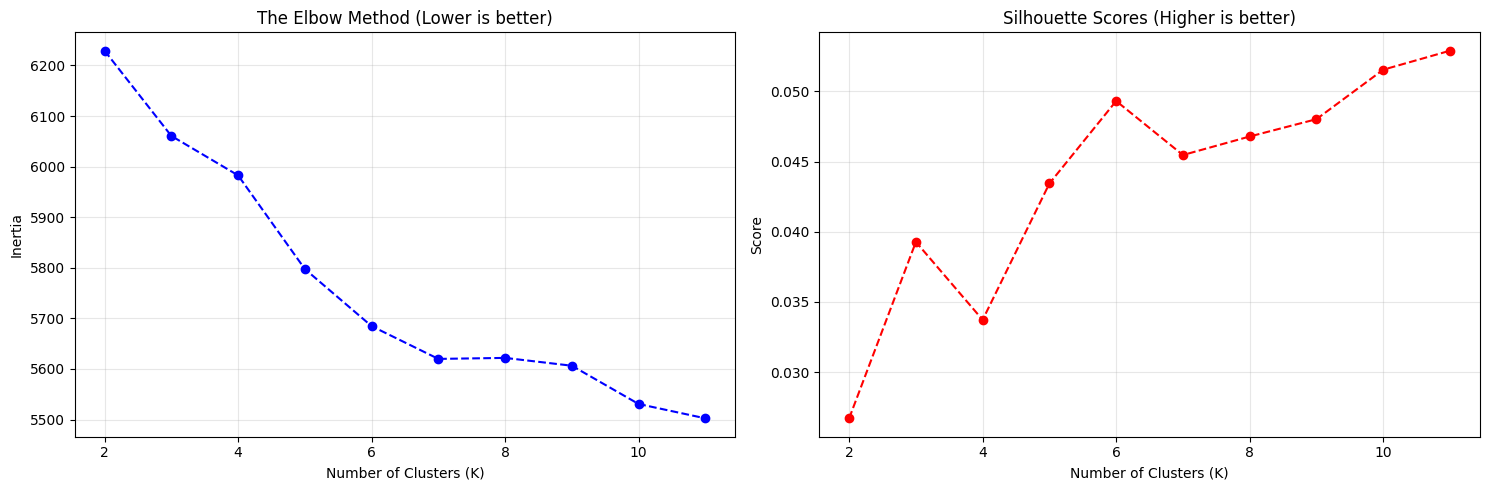

In [3]:


# Notebook: 5_Finding_K.ipynb

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Load the reduced matrix
try:
    X = np.load('matrix_reduced.npy')
    print(f"Data loaded. Shape: {X.shape}")
except FileNotFoundError:
    print("Error: 'matrix_reduced.npy' not found. Run the PCA step first!")

# 2. Setup our test range
inertia = []
silhouette_avg = []
k_range = range(2, 12) # We test from 2 to 11 groups

print("\nStarting calculations... (This might take a minute)")

# 3. The Loop
for k in k_range:
    # n_init='auto' makes it run faster/cleaner
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X)
    
    # 1. Inertia: How tightly packed the groups are
    inertia.append(kmeans.inertia_)
    
    # 2. Silhouette: How "right" each movie feels in its group (1.0 is perfect)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_avg.append(score)
    
    print(f"Checked K={k} | Silhouette Score: {score:.4f}")

# 4. Visualize the "Winning" K
plt.figure(figsize=(15, 5))

# Plot 1: The Elbow Method
# LOOK FOR: The point where the line starts to flatten out (the 'elbow')
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', color='blue', linestyle='--')
plt.title('The Elbow Method (Lower is better)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True, alpha=0.3)

# Plot 2: Silhouette Scores
# LOOK FOR: The highest peak. Higher score = better defined groups.
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_avg, marker='o', color='red', linestyle='--')
plt.title('Silhouette Scores (Higher is better)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()